In [60]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture as gm

import pandas as pd

In [53]:
path = '/Users/emmadionne/Documents/'
file = 'test_angs_metrics.hdf5'
tsv_output_file = path + "test_angs_mags_metrics.csv"
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [54]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

#print(data.head())

In [48]:
# notnoise_index = data.loc[data['move_standard_deviation'] < 1].index
# data = data.loc[notnoise_index]

# def sepHist(data, artifact, noise):
    
#     noisedf = data[classify == 2]
#     artifactdf = data[classify == 1]
#     sigdf = data[classify == 0]
#     return noisedf, artifactdf, sigdf

# noisedf, artifactdf, sigdf = sepHist(data, artifact, noise)

# body_rest_brain_active_index = data.loc[data['mov.eventrest'] == 0 and data['brain.eventrest'] == 1].index
# body_rest_brain_rest_index = data.loc[data['mov.eventrest'] == 0 and data['brain.eventrest'] == 0].index
# body_active_brain_active_index = data.loc[data['mov.eventrest'] == 1 and data['brain.eventrest'] == 1].index
# body_active_brain_rest_index = data.loc[data['mov.eventrest'] == 1 and data['brain.eventrest'] == 0].index
print(len(data.loc[(data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index)]))
print(len(data.loc[(data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index)]))
print(len(data.loc[(data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index)]))
print(len(data.loc[(data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index)]))
      
      
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 0
#data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 3
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 1
#data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 2



# for col in col_list:
#     print(col)

#     fig , ax1 = plt.subplots()
#     ax1.hist(data.loc[body_rest_brain_active_index, col], bins = 25, alpha = 0.5, label ='body_rest_brain_active_index', color = 'g')
#     ax1.grid(False)         
#     ax1.set_xlabel('Values')
#     ax1.set_ylabel('# of instances', color = 'green')

#     ax2 = ax1.twinx()
#     ax2.hist(data.loc[body_rest_brain_rest_index, col], bins = 25, alpha = 0.5, label ='body_rest_brain_rest_index', color = 'b')
#     ax2.set_ylabel('# of instances', color = 'blue')
#     ax2.grid(False)
    
#     ax3 = ax1.twinx()
#     ax3.hist(data.loc[body_active_brain_active_index, col], bins = 25, alpha = 0.5, label = 'body_active_brain_active_index', color = 'r')
#     ax3.set_ylabel('# of instances', color = 'red')
#     ax3.grid(False)
    
#     ax4 = ax1.twinx()
#     ax4.hist(data.loc[body_active_brain_rest_index, col], bins = 25, alpha = 0.5, label = 'body_active_brain_rest_index', color = 'o')
#     ax4.set_ylabel('# of instances', color = 'orange')
#     ax4.grid(False)
# #     ax2.hist(noisedf[col].dropna(), bins = 25, alpha = 0.5, label ='noise', color = 'r')
# #     ax2.set_xlabel('Values')
# #     ax2.set_ylabel('# of instances', color = 'red')
    
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')
#     ax3.legend(loc = 'bottom left')
#     ax4.legend(loc = 'bottom right')
#     plt.show()

    
    
# #     fig = plt.figure()
# #     x = data.loc[(data[col]) & (noise[:X_reduced_tsne.shape[0]] == 0)]
# #     y = data.iloc[[noise[:X_reduced_tsne.shape[0]] == 1],col]
# #     ax = fig.add_subplot(111)
# #     _ = ax.hist(x)
# #     _ = ax.hist(y, color ='red', alpha=0.3)
    
# # #     data[col,np.where(noise[:X_reduced_tsne.shape[0]] == 0)]
# # #     d
# #     plt.show()

# # for col in col_list:
# #     print(col)
# #     data3[col].apply(np.log2).hist(by = noise[:X_reduced_tsne.shape[0]])
# #     plt.show()


1513
2162
297
28


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


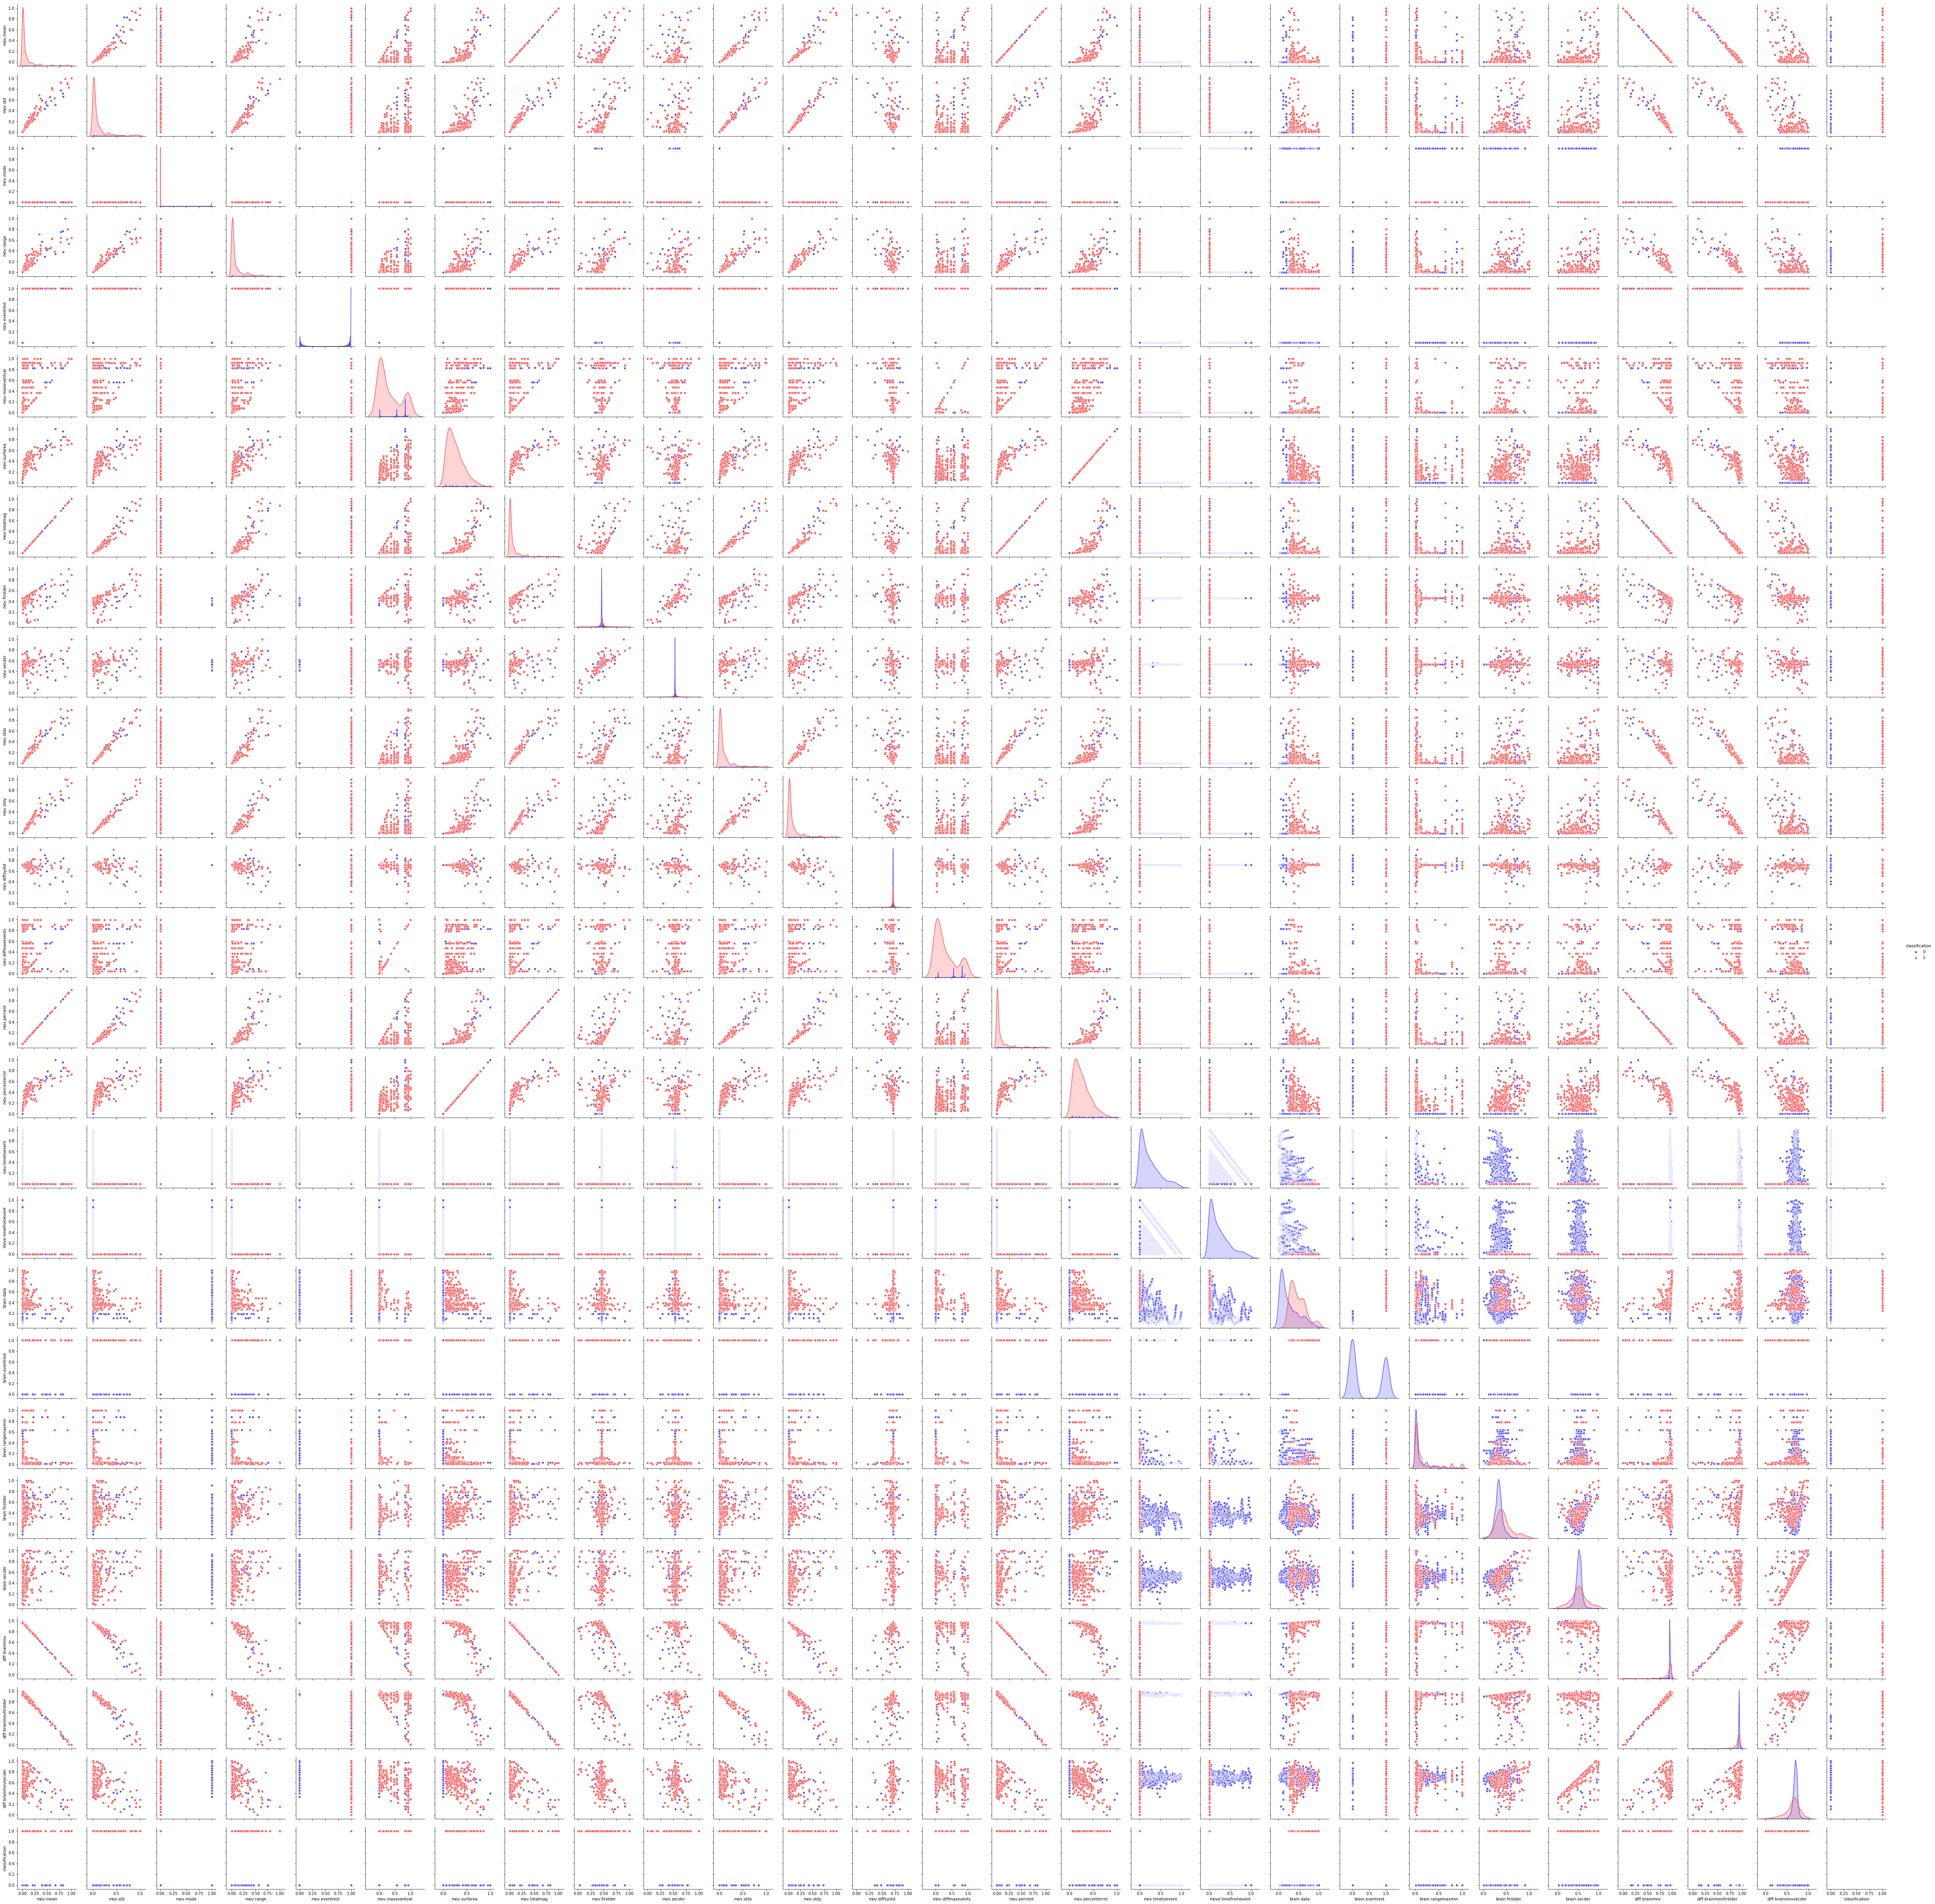

In [50]:
# Both temporal and spatial metrics visualize  
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o"], 
             hue_order = [0, 1], hue='classification', palette = 'seismic')
plt.savefig('/Users/emmadionne/Documents/metrics_pairplot.png')
#plt.show()

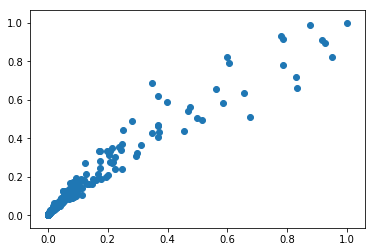

In [34]:
plt.scatter(data['mov.mean'], data['mov.std'])

      mov.mean  mov.std
0          0.0      0.0
1          0.0      0.0
2          0.0      0.0
3          0.0      0.0
4          0.0      0.0
5          0.0      0.0
6          0.0      0.0
7          0.0      0.0
8          0.0      0.0
9          0.0      0.0
10         0.0      0.0
11         0.0      0.0
12         0.0      0.0
13         0.0      0.0
14         0.0      0.0
15         0.0      0.0
16         0.0      0.0
17         0.0      0.0
18         0.0      0.0
19         0.0      0.0
20         0.0      0.0
21         0.0      0.0
22         0.0      0.0
23         0.0      0.0
24         0.0      0.0
25         0.0      0.0
26         0.0      0.0
27         0.0      0.0
28         0.0      0.0
29         0.0      0.0
...        ...      ...
3970       0.0      0.0
3971       0.0      0.0
3972       0.0      0.0
3973       0.0      0.0
3974       0.0      0.0
3975       0.0      0.0
3976       0.0      0.0
3977       0.0      0.0
3978       0.0      0.0
3979       0.0  

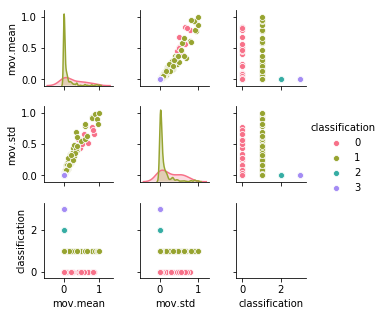

In [24]:
# Both temporal and spatial metrics visualize  
temp = pd.DataFrame()
temp["mov.mean"] = data["mov.mean"]
temp["mov.std"] = data["mov.std"]
print(temp)
temp = temp.astype('float16')
temp['classification'] = np.zeros(len(data))
temp['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 3
temp['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 2
temp['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 1
temp['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 0



sns.pairplot(temp, 
             diag_kind="kde", height = 1.5, 
             markers=["o", "o", "o", "o"], 
             hue_order = [0, 1, 2, 3], hue='classification', palette = 'husl')

In [ ]:
plt.imshow(data.corr().values, aspect = 'auto', cmap = "seismic")
plt.colorbar()

(-0.5, 1.5)

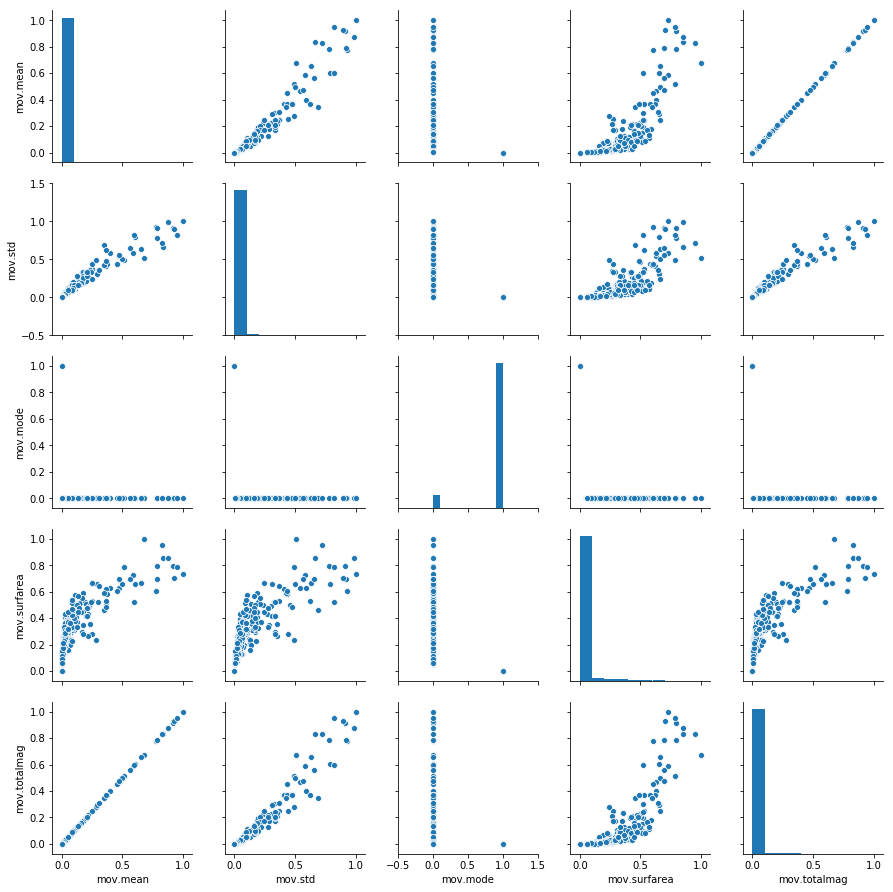

In [9]:
g = sns.pairplot(data.fillna(value=0)[['mov.mean', 'mov.std', 'mov.mode', 'mov.surfarea', 'mov.totalmag']])
g.axes[1,2].set_xlim(-0.5, 1.5)
g.axes[1,2].set_ylim(-0.5, 1.5)

In [42]:
temp1 = pd.DataFrame()
temp1 = data.copy()
temp1 = temp1.astype('float16')
temp1['classification'] = np.zeros(len(data))
temp1['classification'].iloc[temp1.loc[(temp1['mov.eventrest'] == 0.0) & (temp1['brain.eventrest'] == 1.0)].index] = 1
temp1['classification'].iloc[temp1.loc[(temp1['mov.eventrest'] == 0.0) & (temp1['brain.eventrest'] == 0.0)].index] = 3
temp1['classification'].iloc[temp1.loc[(temp1['mov.eventrest'] == 1.0) & (temp1['brain.eventrest'] == 1.0)].index] = 0
temp1['classification'].iloc[temp1.loc[(temp1['mov.eventrest'] == 1.0) & (temp1['brain.eventrest'] == 0.0)].index] = 2

sns.pairplot(temp1, 
             diag_kind="kde", 
             markers=["o", "o", "o", "o"], 
             hue_order = [0, 1, 2, 3], hue='classification', palette = 'RdBu')

plt.savefig('/Users/emmadionne/Documents/metrics_pairplot_2.png')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Clustering Data

Automatically created module for IPython interactive environment


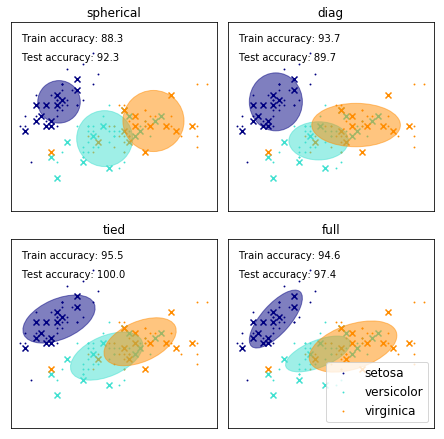

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = pd.DataFrame()
iris = data

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

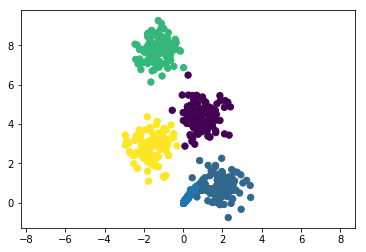

In [87]:
from sklearn.mixture import GaussianMixture as GMM

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
gmm = GMM(n_components=4, random_state=42)
temp3 = pd.DataFrame()
temp3["mov.mean"] = data["mov.mean"]
temp3["mov.std"] = data["mov.std"]

temp_list = temp3.values.tolist()
plt.scatter(temp3["mov.mean"], temp3["mov.std"])
plot_gmm(gmm, X)

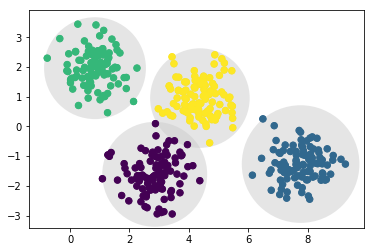

In [88]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting


# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

        
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
path = '/Users/jcrndm/Documents/'
file = 'test_angs_mags_metrics.csv'

tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

'''
In PCA you are maximizing the length of the vector to each of the points from the center point
of the data (mean value of each of the two variables you are dealing with), at the same time, 
MINIMIZING the distance from each point to the line that you drew.

Maximizing variance & Orthogonalization
'''

sklearn_pca = PCA(n_components = 26)
Y_sklearn = sklearn_pca.fit_transform(data)
print(Y_sklearn.shape)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(data)
prediction = kmeans.predict(data)

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
plot_kmeans(kmeans, Y_sklearn)